In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Gupta_Sakshi_112552239_hw1'

/content/drive/My Drive/Gupta_Sakshi_112552239_hw1


In [0]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import statistics as stat

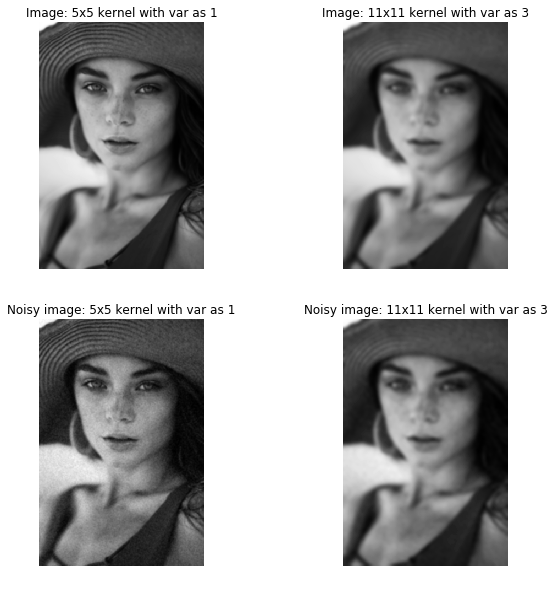

In [21]:
def genGaussianKernel(width, sigma):
    kernel_2d=[]
    n=width//2
    i,j=np.mgrid[-n:n+1,-n:n+1]
    s=1/(2*math.pi*sigma*sigma)
 
    kernel_2d=s*np.exp(-(i**2+j**2)/(2*sigma*sigma))
    # define your 2d kernel here
    #print (kernel_2d/np.sum(kernel_2d))
    return (kernel_2d/np.sum(kernel_2d))

# Load images
img       = cv2.imread('SourceImages/pic.jpg', 0)
img_noise = cv2.imread('SourceImages/pic_noisy.jpg', 0)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5,1)     # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11,3) #Fill in your code here      # 11 by 11 kernel with sigma of 3

# Convolve with image and noisy image

res_img_kernel1 = cv2.filter2D(img,-1,kernel_1)#Fill in your code here
res_img_kernel2 = cv2.filter2D(img,-1,kernel_2)#Fill in your code here
res_img_noise_kernel1 = cv2.filter2D(img_noise,-1,kernel_1)#Fill in your code here
res_img_noise_kernel2 = cv2.filter2D(img_noise,-1,kernel_2)#Fill in your code here

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()


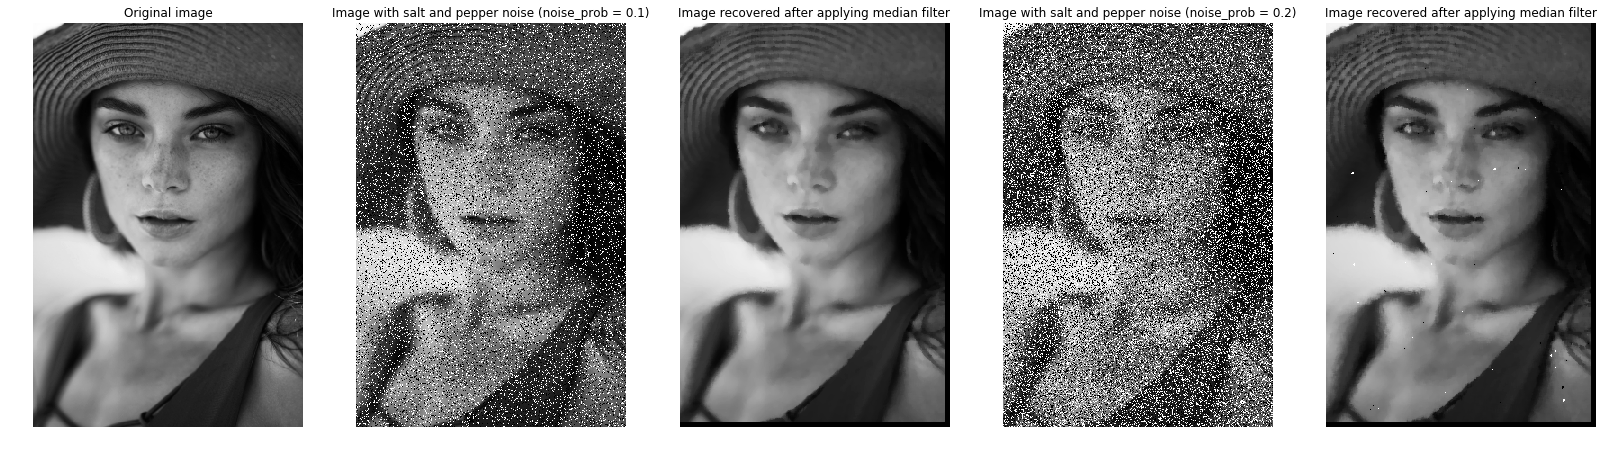

In [22]:

# Function to generate image with salt and pepper noise
def noisy_image_generator(img_in, probability = 0.1):
  # define your function here
  # Fill in your code here
    h,w=img_in.shape
    img_out=np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            a=np.random.uniform()
            if a<probability:
                img_out[i,j]=0
            elif a>1-probability:
                img_out[i,j]=255
            else: img_out[i,j]=img_in[i,j]
    return img_out
  
# Function to apply median filter(window size kxk) on the input image  
def median_filter(img_in, window_size = 5):
  # define your function here
  # Fill in your code here
    h,w=img_in.shape
    #print (w)
    result=np.zeros((h,w))
    fil=np.zeros(window_size*window_size)
    for i in range(h-5):
        for j in range(w-5):
            fil[0]=img_in[i,j]
            fil[1]=img_in[i,j+1]
            fil[2]=img_in[i,j+2]
            fil[3]=img_in[i,j+3]
            fil[4]=img_in[i,j+4]
            fil[5]=img_in[i+1,j]
            fil[6]=img_in[i+1,j+1]
            fil[7]=img_in[i+1,j+2]
            fil[8]=img_in[i+1,j+3]
            fil[9]=img_in[i+1,j+4]
            fil[10]=img_in[i+2,j]
            fil[11]=img_in[i+2,j+1]
            fil[12]=img_in[i+2,j+2]
            fil[13]=img_in[i+2,j+3]
            fil[14]=img_in[i+2,j+4]
            fil[15]=img_in[i+3,j]
            fil[16]=img_in[i+3,j+1]
            fil[17]=img_in[i+3,j+2]
            fil[18]=img_in[i+3,j+3]
            fil[19]=img_in[i+3,j+4]
            fil[20]=img_in[i+4,j]
            fil[21]=img_in[i+4,j+1]
            fil[22]=img_in[i+4,j+2]
            fil[23]=img_in[i+4,j+3]
            fil[24]=img_in[i+4,j+4]
            
            result[i,j]=stat.median(fil)
            
    return result
 
image_s_p1 = noisy_image_generator(img, probability = 0.1)  
result1 = median_filter(image_s_p1, window_size = 5)

image_s_p2 = noisy_image_generator(img, probability = 0.2)  
result2 = median_filter(image_s_p2, window_size = 5)

cv2.imwrite("Results/P1_05.jpg", result1)    
cv2.imwrite("Results/P1_06.jpg", result2)    

# Plot results
plt.figure(figsize = (28, 20))
plt.subplot(1, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(result1, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(result2, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.show()

I think a gaussian filter of size 11x11 with sigma=5 will achieve the same.

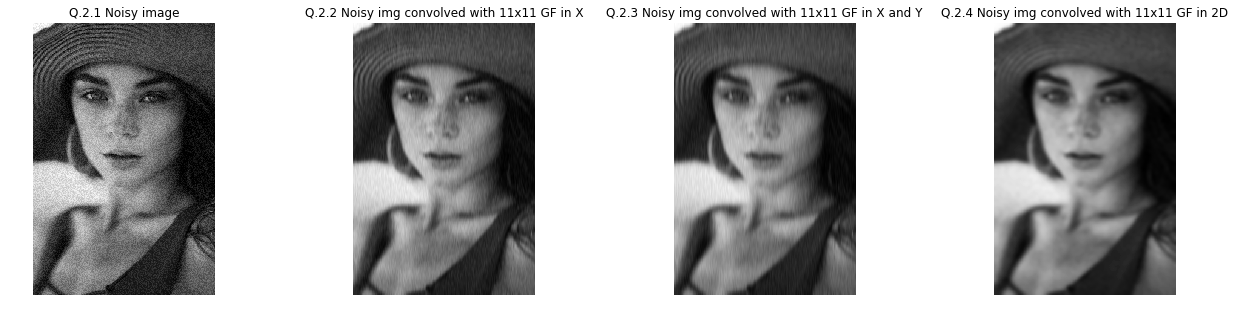

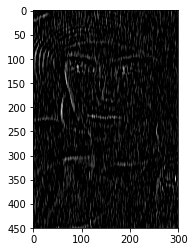

In [23]:
def genGausKernel1D(length, sigma):
    kernel_1d=[]
    n=length//2
    i=np.mgrid[-n:n+1]
    s=1/(math.sqrt(2*math.pi)*sigma)
   
    kernel_1d=s*np.exp(-(i**2)/(2*sigma*sigma))
    # define you 1d kernel here
    # Fill in your code here
    return (kernel_1d/np.sum(kernel_1d))

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width,sigma)#Fill in your code here
kernel_y = np.transpose(kernel_x)#Fill in your code here

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma) 

# Convolve with img_noise
res_img_noise_kernel1d_x  = cv2.filter2D(img_noise,-1,kernel_x)# Fill in your code here 
res_img_noise_kernel1d_xy = cv2.filter2D(res_img_noise_kernel1d_x,-1,kernel_y)# Fill in your code here
res_img_noise_kernel2d    = cv2.filter2D(img_noise,-1,kernel_2d)# Fill in your code here

# Plot results
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_noise, 'gray')
plt.title('Q.2.1 Noisy image')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x, 'gray')
plt.title('Q.2.2 Noisy img convolved with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy, 'gray')
plt.title('Q.2.3 Noisy img convolved with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d, 'gray')
plt.title('Q.2.4 Noisy img convolved with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array here
img_diff = cv2.subtract(res_img_noise_kernel1d_xy,res_img_noise_kernel2d) # Fill in your code here

plt.gray()
plt.imshow(img_diff)

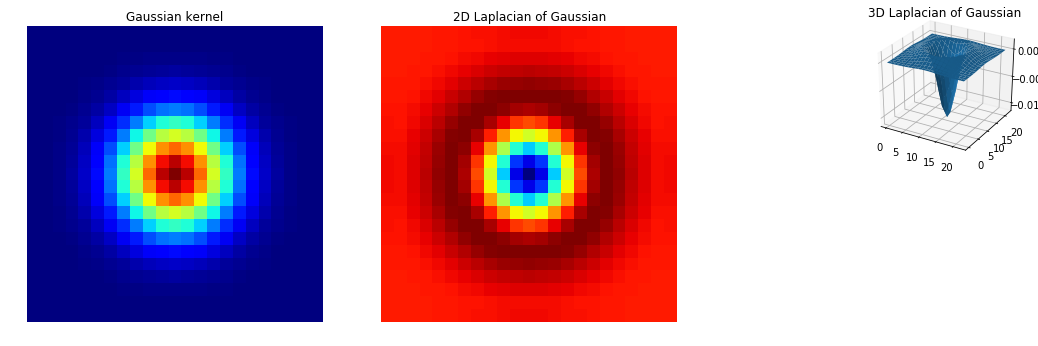

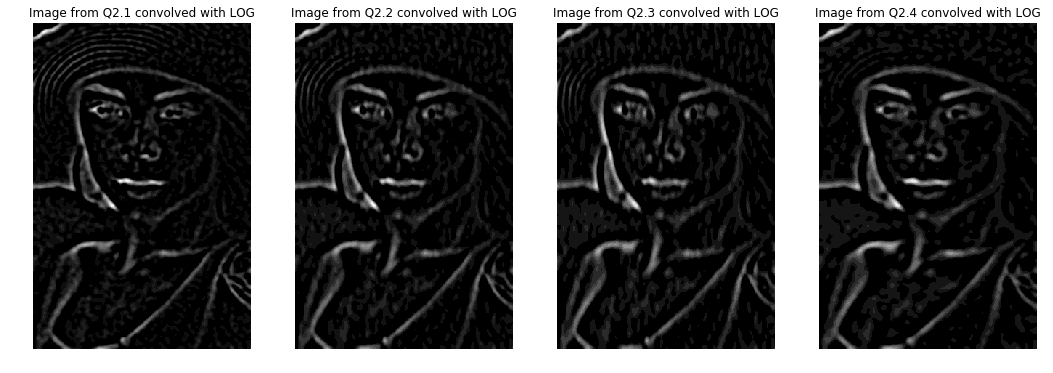

In [24]:
width = 23
sigma = 3

# Create your Laplacian kernel
Laplacian_kernel = np.asarray([[1,1,1],[1,-8,1],[1,1,1]])# Fill in your code here


# Create your Gaussian kernel
Gaussian_kernel = genGaussianKernel(width,sigma) # Fill in your code here

# Create your Laplacian of Gaussian
LoG = cv2.filter2D(Gaussian_kernel,-1,Laplacian_kernel)# Fill in your code here

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# Plot the 3D figure of LoG
# Fill in your code here

i=np.arange(width)
j=np.arange(width)
i,j=np.meshgrid(i,j)
ax=fig.add_subplot(2,5,5,projection='3d')
ax.plot_surface(i,j,LoG)
#ax.set_zlim(0,5)

plt.title('3D Laplacian of Gaussian')
plt.show()

img_noise_LOG = cv2.filter2D(img_noise,-1,LoG)             # Fill in your code here
res_img_noise_kernel1d_x_LOG = cv2.filter2D(res_img_noise_kernel1d_x,-1,LoG)  # Fill in your code here
res_img_noise_kernel1d_xy_LOG = cv2.filter2D(res_img_noise_kernel1d_xy,-1,LoG)# Fill in your code here
res_img_noise_kernel2d_LOG =  cv2.filter2D(res_img_noise_kernel2d,-1,LoG)  # Fill in your code here


# Plot results
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_noise_LOG, 'gray')
plt.title('Image from Q2.1 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x_LOG, 'gray')
plt.title('Image from Q2.2 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy_LOG, 'gray')
plt.title('Image from Q2.3 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d_LOG, 'gray')
plt.title('Image from Q2.4 convolved with LOG')
plt.axis("off")

plt.show()


True

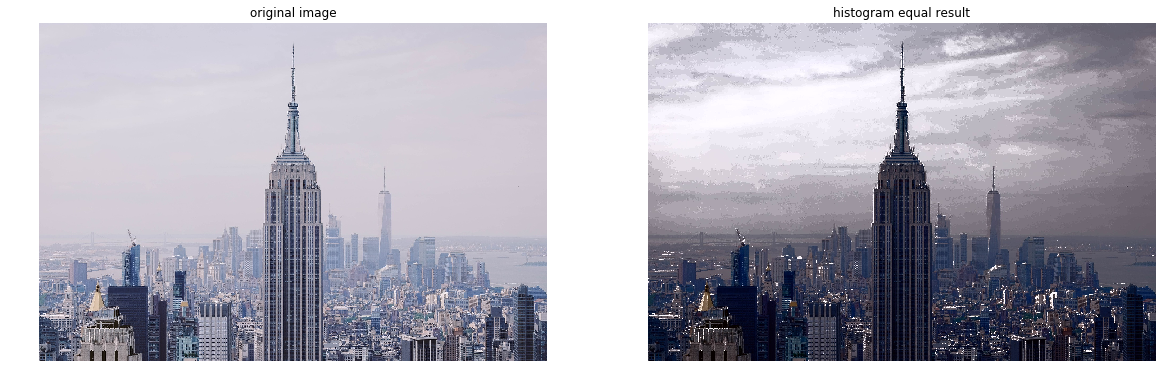

In [25]:
#Reference taken from OpenCv Documentation
def histogram_equalization(img_in):
    # Write histogram equalization here
    # Fill in your code here
    imgrb = cv2.cvtColor(img_in, cv2.COLOR_BGR2YCrCb)
    im, r, b = cv2.split(imgrb)
    h,b1 = np.histogram(im.flatten(),256,[0,256])
    cdf = h.cumsum()
    cdf1 = np.ma.masked_equal(cdf,0) #masking
    cdf1=255*cdf1/cdf1.max()  #transformation
    cdf = np.ma.filled(cdf1,0).astype('uint8') #unmasking
    res = cv2.merge([cdf[im], r, b])
    img_out = cv2.cvtColor(res, cv2.COLOR_YCrCb2BGR)
  
    return True, img_out

# Read in input images
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)

# Histogram equalization
succeed, output_image = histogram_equalization(img_equal)


# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")


# Plot results
plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")


# Write out results
cv2.imwrite("Results/P4_01.jpg", output_image)

True

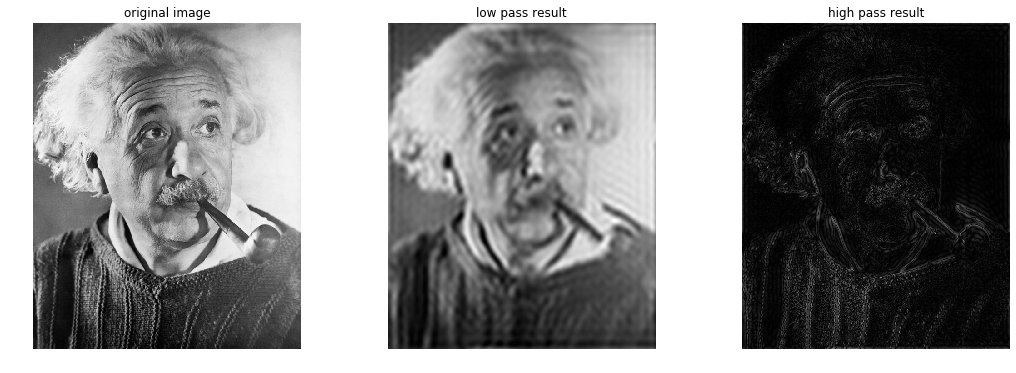

In [42]:
#Reference taken from OpenCv Documentation
def low_pass_filter(img_in):

    # Write low pass filter here
    # Fill in your code here
    #low=np.ones((5,5),np.float32)/25
    # mask
    # Fill in your code here
    #print (img_in.shape())
    # apply mask and inverse DFT
    # Fill in your code here
    #print (low)
    #mask=np.zeros(img_in.shape,dtype = "uint8")
    #mimg=cv2.bitwise_and(img_in, mask)
    #img_out=np.fft.ifft(mimg)
    d = np.fft.fft2(img_in)
    ds = np.fft.fftshift(d)
    
    r,c = img_in.shape
    cr,cc = r//2,c//2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((r,c),np.uint8)
    mask[cr-30:cr+30, cc-30:cc+30] = 1
    # apply mask and inverse DFT
    f = ds*mask
    fs = np.fft.ifftshift(f)
    img_out = np.fft.ifft2(fs)
    #img_out = cv2.magnitude(img_out[:,:,0],img_out[:,:,1])
    img_out=np.abs(img_out)

    return True, img_out


def high_pass_filter(img_in):

    # Write high pass filter here
    # Fill in your code here
    
    # mask
    # Fill in your code here
    
    # apply mask and inverse DFT
    # Fill in your code here
    d = np.fft.fft2(img_in)
    ds = np.fft.fftshift(d)
    
    r,c = img_in.shape
    cr,cc = r//2,c//2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((r,c),np.uint8)
    mask[cr-30:cr+30, cc-30:cc+30] =0
    # apply mask and inverse DFT
    f = ds*mask
    fs = np.fft.ifftshift(f)
    img_out = np.fft.ifft2(fs)
    #img_out = cv2.magnitude(img_out[:,:,0],img_out[:,:,1])
    img_out=np.abs(img_out)

    return True, img_out

# Read in input images
img_filter = cv2.imread('SourceImages/Einstein.jpg', 0)

# Low and high pass filter
succeed1, output_low_pass_image1  = low_pass_filter(img_filter)
succeed2, output_high_pass_image2 = high_pass_filter(img_filter)



# Plot results
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_filter, 'gray')
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(output_low_pass_image1, 'gray')
plt.title('low pass result')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output_high_pass_image2, 'gray')
plt.title('high pass result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", output_low_pass_image1)
cv2.imwrite("Results/P5_02.jpg", output_high_pass_image2)